In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [43]:
df = pd.read_csv('Datasets/Housing.csv')
df.head()
X = df['area']
Y = df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print('Training Size : ' , X_train.shape[0])
print('Test Size : ' , X_test.shape[0])

Training Size :  436
Test Size :  109


In [6]:
X_train_np = np.array(X_train)
Y_train_np = np.array(Y_train)

x_mean = X_train_np.mean()
y_mean = Y_train_np.mean()

num = np.sum((X_train_np-x_mean)*(Y_train_np-y_mean))

den = np.sum((X_train_np - x_mean) ** 2)

slope = num/den

intercept = y_mean - slope*x_mean

print('Slope :' , slope)
print('Intercept :', intercept)

Slope : 425.7298419387829
Intercept : 2512254.263959343


In [7]:
model = LinearRegression()
model.fit(pd.XFrame(X_train),pd.DataFrame(Y_train))
print('Slope :',model.coef_[0][0])
print('Intercept :',model.intercept_[0])

Slope : 425.72984193878284
Intercept : 2512254.2639593435


### Linear Regression for Multivariate 

Intercept: -374486.4487
Coefficients: [244.4553 114436.1415 988506.4017 451365.1470 423664.9469 302237.9836
 350092.0640 853585.6384 868877.2368 277767.2413 653102.8732 381228.4216]
Mean Square Error: 1111518462879.14


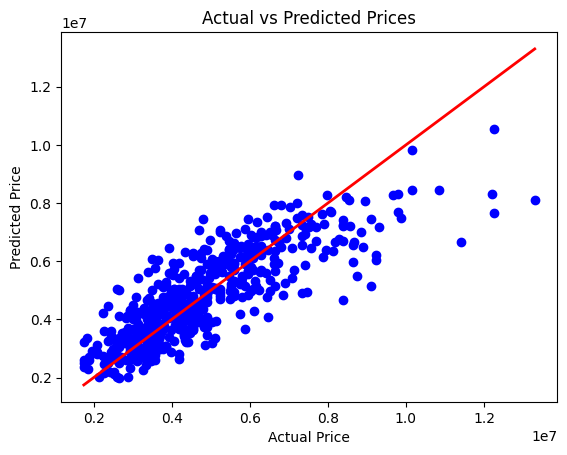

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Datasets/Housing.csv")

for col in data.columns:
    if data[col].dtype == object:
        if set(data[col].unique()) == {'yes', 'no'}:
            data[col] = data[col].map({'yes': 1, 'no': 0})

mapping = {'furnished': 1, 'semi-furnished': 1, 'unfurnished': 0}
data['furnishingstatus'] = data['furnishingstatus'].map(mapping)

target = data['price']
features = data.drop(columns=['price'])

def perform_linear_regression(features, target):
    features = np.array(features)
    target = np.array(target)

    intercepts = np.ones(features.shape[0]).reshape(-1, 1)
    features = np.concatenate([intercepts, features], axis=1)

    features_transpose = features.T
    temp_matrix = np.linalg.inv(features_transpose.dot(features)).dot(features_transpose)
    coeffs = temp_matrix.dot(target)
    
    return coeffs

coeffs = perform_linear_regression(features, target)

intercept_value = coeffs[0]
slope_values = coeffs[1:]

print("Intercept: {:.4f}".format(intercept_value))
print("Coefficients: {}".format(np.array2string(slope_values, formatter={'float_kind': lambda x: f"{x:.4f}"})))

predicted_values = np.concatenate([np.ones((features.shape[0], 1)), np.array(features)], axis=1).dot(coeffs)

mean_square_error = np.mean((predicted_values - target) ** 2)
print("Mean Square Error:", mean_square_error)

plt.scatter(target, predicted_values, color='blue')
plt.plot([target.min(), target.max()], [target.min(), target.max()], color='red', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()


In [38]:
# Create and train the model
X = df.drop(['area','furnishingstatus'],axis = 1)

binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
X[binary_columns] = X[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)

y = df['area']
# Split X and Y
X_train , X_test , y_train , pred = train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train)

# Predict on new data
predictions = model.predict(X_test)
print("Predictions:", pred)

NaN detected in gradient
Predictions: 316    5900
77     6500
360    4040
90     5000
493    3960
       ... 
15     6000
357    6930
39     6000
54     6000
155    6100
Name: area, Length: 109, dtype: int64
